# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

# DATA GATHERING 

In [2]:
raw_data = pd.read_csv('lending_club_loan_two.csv')
raw_data.head(n=10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
5,20000.0,36 months,13.33,677.07,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0,...,8.0,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\r\nNorth Deniseb...
6,18000.0,36 months,5.32,542.07,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0,...,8.0,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,3.0,0.0,"1008 Erika Vista Suite 748\r\nEast Stephanie, ..."
7,13000.0,36 months,11.14,426.47,B,B2,Office Depot,10+ years,RENT,46000.0,...,11.0,0.0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.0,USCGC Nunez\r\nFPO AE 30723
8,18900.0,60 months,10.99,410.84,B,B3,Application Architect,10+ years,RENT,103000.0,...,13.0,0.0,18637.0,32.9,40.0,w,INDIVIDUAL,3.0,0.0,USCGC Tran\r\nFPO AP 22690
9,26300.0,36 months,16.29,928.40,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.0,...,13.0,0.0,22171.0,82.4,37.0,f,INDIVIDUAL,1.0,0.0,"3390 Luis Rue\r\nMauricestad, VA 00813"


# DATA EXPLANATION

In [3]:
data = raw_data.copy()
data.shape

(396030, 27)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [5]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [6]:
data.describe(percentiles=[0.10,0.25,0.50,0.75,0.90]).T

,count,mean,std,min,10%,25%,50%,75%,90%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,5000.00,8000.00,12000.00,20000.00,26000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,7.89,10.49,13.33,16.49,19.52,30.99
installment,396030.0,431.849698,250.727790,16.08,158.86,250.33,375.43,567.30,785.48,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,34000.00,45000.00,64000.00,90000.00,120000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,6.90,11.28,16.91,22.98,28.50,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,6.00,8.00,10.00,14.00,18.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,0.00,1.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,3091.00,6025.00,11181.00,19620.00,31470.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,19.70,35.80,54.80,72.90,86.20,892.30
total_acc,396030.0,25.414744,11.886991,2.00,12.00,17.00,24.00,32.00,41.00,151.00


# DATA PREPROCESSING

In [7]:
data.nunique() #checking unique values of data

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [8]:
data['loan_status'].value_counts() #understanding the target variable

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

# MISSING VALUES:

In [9]:
data.apply(lambda bankdata : sum(bankdata.isnull()))   #null value check

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

emp_title and emp_length will be our first two variables. Let's count the number of distinct job titles listed by customers.

In [10]:
data['emp_title'].nunique()

173105

That nearly amounts to a big number of distinct titles. It is very challenging to organize these numerous unique titles into a set of dummy variable attributes or to assign numeric values to them.Realistically, it would be best to remove this column.

In [11]:
data = data.drop('emp_title',axis = 1)

now, lets check all the customers employment length

In [12]:
sorted(set(data['emp_length'].dropna()))

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [13]:
emp_length_order = sorted(set(data['emp_length'].dropna()))

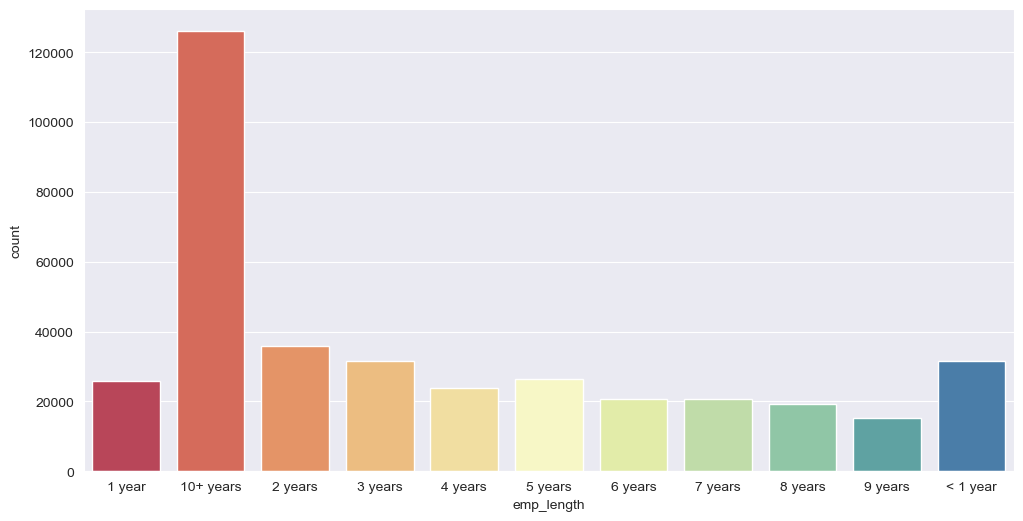

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length', data=data, order=emp_length_order, palette='Spectral')
plt.show()

Let's verify loan_status depending on these categories now to determine how loan_status and emp_length relate to one another.

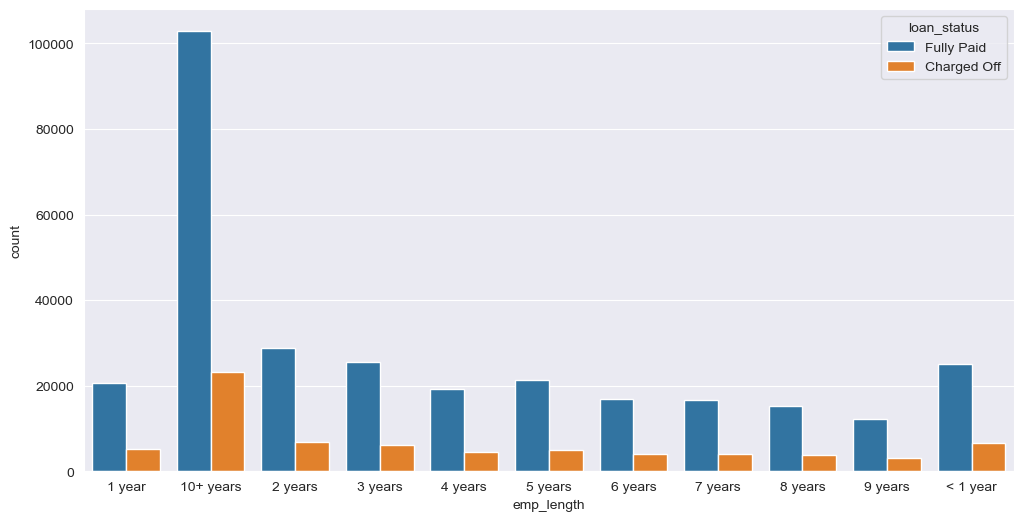

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'emp_length',data = data , order = emp_length_order, hue = 'loan_status')
plt.show()

Long-term employees are anticipated to repay loans at a higher rate than those who are not. Yet, this does not suggest that emp_length and getting charged off have a significant correlation.

Let's go a little deeper to see if emp_length has any useful information for forecasting loan repayment.

For each group, we will determine the proportion of charged-off to completely paid debts.

In [16]:
data['loan_repaid'] = data['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

In [17]:
data[['loan_status','loan_repaid']].head(10)

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
5,Fully Paid,1
6,Fully Paid,1
7,Fully Paid,1
8,Fully Paid,1
9,Fully Paid,1


In [18]:
emp_charged = data[data['loan_repaid'] == 0].groupby('emp_length').count()['loan_status']
emp_paid = data[data['loan_repaid'] == 1].groupby('emp_length').count()['loan_status']

ratio = emp_charged / emp_paid
ratio

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

We can draw the conclusion that there is not much of a relationship between length of employment and loan repayment because there is no noticeable difference between the ratios of each category.

It is OK to remove this column.

In [19]:
data = data.drop('emp_length',axis = 1)

We then examine the title and purpose columns since their titles can imply the same thing in the data.

In [20]:
data['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [21]:
data['purpose'].head()

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
Name: purpose, dtype: object

It has been noted that the purpose column's subcategory, the title column, exists. This is essentially redundant information, therefore we should remove the title column in favor of the more pertinent purpose column.

In [22]:
data = data.drop('title', axis = 1)

In [23]:
data.apply(lambda bankdata : sum(bankdata.isnull()))   #null value check

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

The mort_acc column has a lot of missing values.

A mortgage is a loan provided by a bank or other financial institution to aid in the acquisition of real estate. Since the property itself is the mortgage's collateral, the bank has the right to sell the home and collect its losses if the borrower stops making loan payments on time and defaults.

In [24]:
#Calculating the percentage of data mort_acc column holds over the whole dataset
print("{:.2%}".format(data['mort_acc'].isnull().sum()/data.shape[0]))

9.54%


It's almost 10%. We are unable to just delete 10% of our data. Moreover, because Mortage can correlate with other variables in the dataset, we cannot simply remove the column alone. Removing the column could have an impact on other attributes, which would be problematic for forecasts.

Instead, we may try figuring out how to fill in the remaining blank variables.


Let's investigate the relationship between additional features and the mort_acc feature.

In [25]:
data.corrwith(data['mort_acc']).sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
dtype: float64

Among all other attributes, the total_acc column and mort_acc have a strong association.
With relation to the total _acc categories, we will calculate the average of mort_acc.

In [26]:
total_average = data.groupby('total_acc').mean()['mort_acc']
total_average

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

Based on their total_acc values, let's fill in the missing mort_acc values. If the mort_acc is absent, the mean value corresponding to its total acc_value from the series we produced previously will be used to fill in the blank. This entails utilizing a two-column.apply() function.

In [27]:
#Defining a function that will return mean

def fill_mort(total_acc, mort_acc):
    
    if np.isnan(mort_acc): #Checks if the mort_acc is NaN
        #if so, it returns the avg mort_acc value for the corresponding total_acc value for that row.
        return total_average[total_acc]
    
    else:
        return mort_acc

In [28]:
data['mort_acc'] = data.apply(lambda x: fill_mort(x['total_acc'], x['mort_acc']), axis = 1 )

In [29]:
#Checking the mortage column again for null values
data['mort_acc'].isnull().sum()

0

Finally, the revol_util and pub_rec bankruptcies columns only have a small number of null entries. They make up less than 5% of the overall amount of data. Hence, rather than eliminating the entire column, we can simply just remove those missing data items. We won't lose a lot of information.

In [30]:
data = data.dropna()

In [31]:
data.apply(lambda bankdata : sum(bankdata.isnull()))   #null value check

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

### Feature Engineering:

Here, we'll mostly concentrate on categorical data and investigate various One-Hot Encoding techniques for transforming this categorical data into either numerical values or dummy variables.

First, let's examine every category feature in our dataset.

In [32]:
#Extracting the column names that have categorical or string values
data.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

Let's check the term Feature

In [33]:
data['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

Our two main divisions are 36 months and 60 months. We'll just translate these into their numerical equivalents, designating these categories as "36" and "60."

In [34]:
data['term'] = data['term'].map({data['term'].unique()[0]: 36, data['term'].unique()[1]:60})

In [35]:
data['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

##### Next are the grades and sub-grades features

We are already aware that grades are divided into subgrades. Subgrades rather than grades will provide us greater information. Just droop that column.

In [36]:
data = data.drop('grade', axis = 1)

In [37]:
dummies = pd.get_dummies(data['sub_grade'], drop_first= True)
data = pd.concat([data.drop('sub_grade', axis = 1), dummies], axis = 1)

The verification_status, application_ type, initial_list_status, and purpose will be discussed next.

In [38]:
data['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [39]:
data['application_type'].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [40]:
data['initial_list_status'].value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

In [41]:
data['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

We will convert all these features into dummy variables.

In [42]:
columns = ['verification_status', 'application_type','initial_list_status','purpose']

dummies = pd.get_dummies(data[columns], drop_first= True)

data = pd.concat([data.drop(columns, axis = 1), dummies], axis = 1)

Now, let's check the home_ownership column

In [43]:
data['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In this case, the categories "None" and "Any" have very little information and are essentially grouped with "Other."

The feature can then be transformed into dummy variables.

In [44]:
data['home_ownership'] = data['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [45]:
dummies = pd.get_dummies(data['home_ownership'], drop_first= True)

data = pd.concat([data.drop('home_ownership', axis = 1), dummies], axis = 1)

Lets explore the address feature

In [46]:
data['address']

0            0174 Michelle Gateway\r\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                   823 Reid Ford\r\nDelacruzside, MA 00813
4                    679 Luna Roads\r\nGreggshire, VA 11650
                                ...                        
396025     12951 Williams Crossing\r\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\r\nRachelborough, ...
396027    953 Matthew Points Suite 414\r\nReedfort, NY 7...
396028    7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
396029        787 Michelle Causeway\r\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

Notice that these are full address of the borrower and we are gonna extract only the zipcode from these addresses.

In [47]:
data['zip_code'] = data['address'].apply(lambda x: x[-5:])

In [48]:
data['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

We note that there aren't many zip codes that are exclusive. We cannot simply convert them to integers and leave them that way since the model will read them erroneously in that instance. These might appear to be in some sequence to the model. Instead, we shall create dummy variables out of these.

In [49]:
dummies = pd.get_dummies(data['zip_code'], drop_first= True)

data = pd.concat([data.drop(['zip_code', 'address'], axis = 1), dummies], axis = 1)

Now, let's check the issue_d column

In [50]:
data['issue_d']

0         Jan-2015
1         Jan-2015
2         Jan-2015
3         Nov-2014
4         Apr-2013
            ...   
396025    Oct-2015
396026    Feb-2015
396027    Oct-2013
396028    Aug-2012
396029    Jun-2010
Name: issue_d, Length: 395219, dtype: object

If the problem aim is properly understood, we are essentially forecasting whether a borrower will repay the loan based on their characteristics. We won't even grant the loan if we believe the borrower won't be able to repay it.
Keeping this feature in our model will, in practice, result in data leakage. We shall therefore omit this column.

In [51]:
data = data.drop('issue_d',axis = 1)

Lastly we will take a look at the earlies_cr_line feature

In [52]:
data['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

These are basically time-stamps of the customer when their first credit line was opened. We will extract only the year from those tim stamps.

In [53]:
data['earliest_cr_line'] = data['earliest_cr_line'].apply(lambda x: x[-4:])
data['earliest_cr_line']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: object

We won't be converting these into dummy variables as the year itself acts as a dummy type.
We will not be needing the loan status column anymore so we will just drop it.

In [54]:
data_cleaned = data.copy()

In [55]:
data_cleaned.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,1990,16.0,0.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,2004,17.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,2007,13.0,0.0,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,2006,6.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,1999,13.0,0.0,...,0,0,1,0,0,0,0,0,0,0


Saving the final dataset

In [56]:
data_cleaned.to_csv('Loan_Repayment_Cleaned.csv')

In [57]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 80 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   loan_status                          395219 non-null  object 
 6   dti                                  395219 non-null  float64
 7   earliest_cr_line                     395219 non-null  object 
 8   open_acc                             395219 non-null  float64
 9   pub_rec                              395219 non-null  float64
 10  revol_bal                            395219 non-null  float64
 11  revol_util   

In [58]:

import warnings
warnings.filterwarnings('ignore')# Basic EDA

raw_data = pd.read_csv('lending_club_loan_two.csv')
raw_data.head()


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [59]:
data = raw_data.copy()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [60]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


# Exploratory Data Analysis
Since we are attempting to predict loan_status, let's create a countplot to observe how balanced the data is.

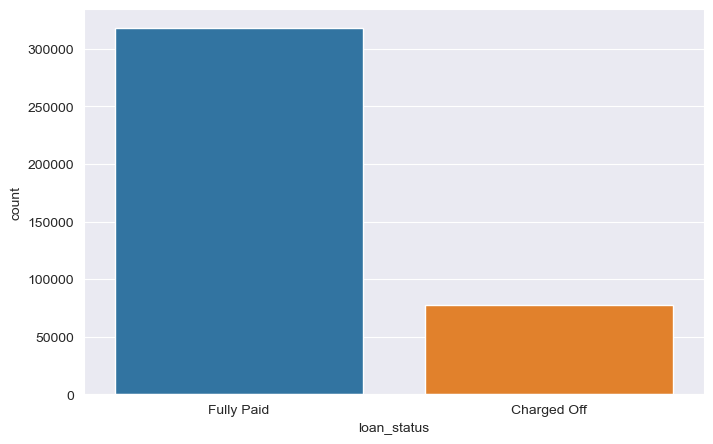

In [61]:
plt.figure(figsize=(8,5))
sns.countplot(data['loan_status'])
plt.show()

This is an imbalanced dataset. There are much more customers that fully paid the loan than the number of customers that did'nt repay the loan and were charged off.
Let's explore the loan_amnt column. We will observe the distribution of loan amounts by plotiing a distribution plot.

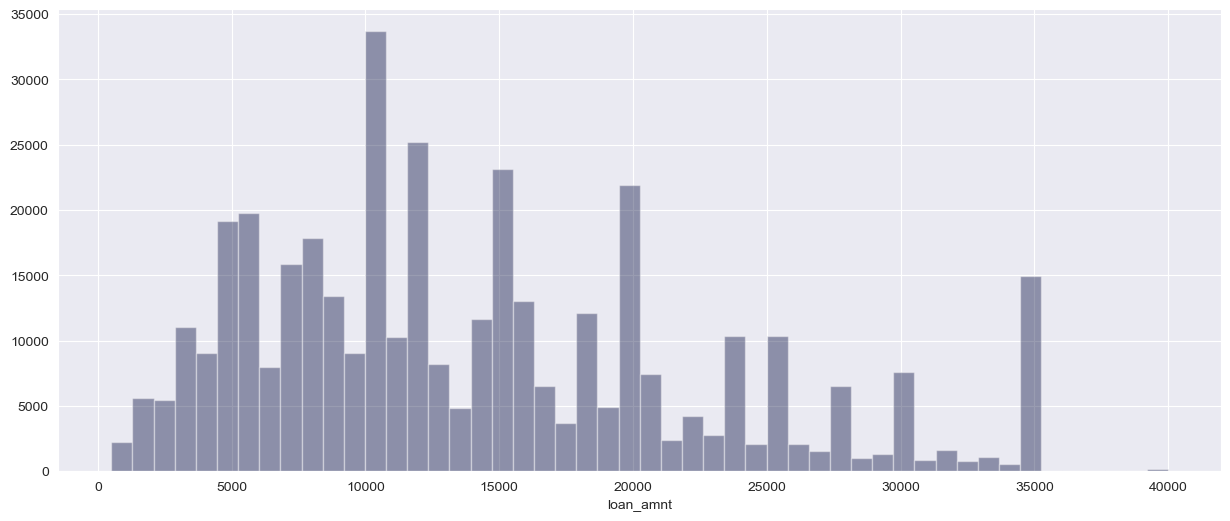

In [62]:
plt.figure(figsize=(15,6))
sns.distplot(data['loan_amnt'], color = '#01083d', kde=False) #Google 'hex color' to get the hexa code for the desired color 
plt.show()

Most of the loans were taken as a round up number like 10000, 15000, 20000 rather than some arbitrary distribution of loan amount.

# Correlation between features

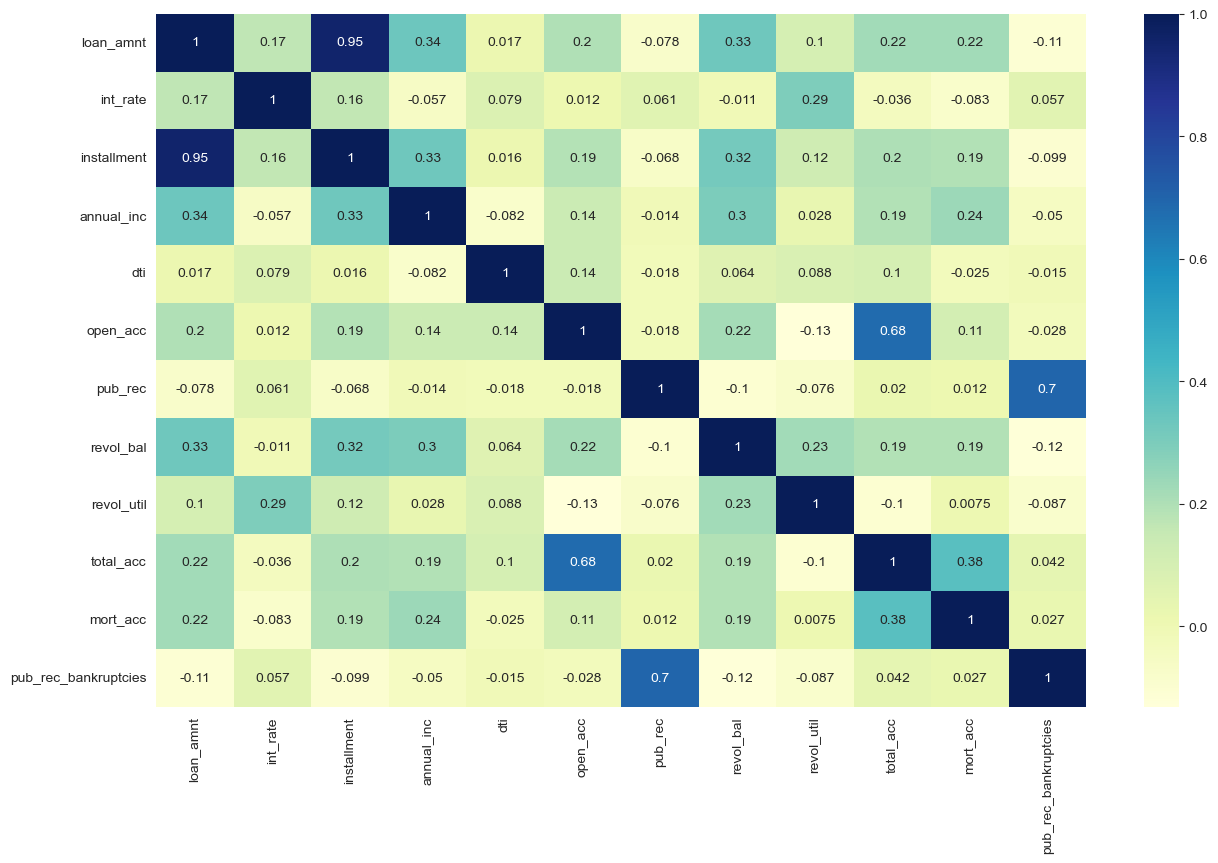

In [63]:
plt.figure(figsize=(15,9))
sns.heatmap(data.corr(), annot = True, cmap='YlGnBu')
plt.show()

An interesting fact to note here is that the loan_amnt and installment features are very highly correlated with each other. This is quite logical because the higher the loan amount, higher will be the installment and vice versa.
Let's further explore the behaviour of these two feautures.

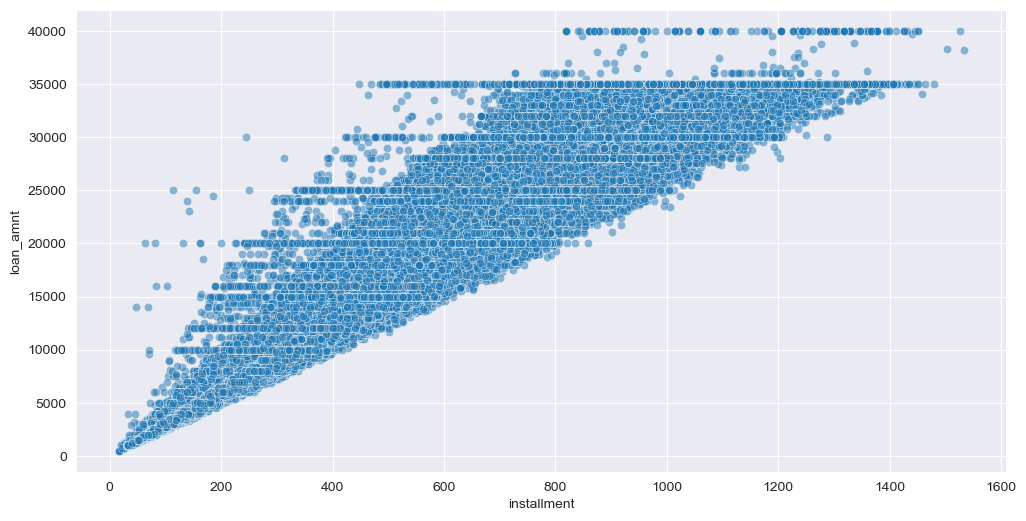

In [64]:
plt.figure(figsize = (12,6))
sns.scatterplot(data['installment'], data['loan_amnt'], alpha = 0.5)
plt.show()


As expected we can see a linear relationship between the two features.

Let's observe the number of loans that were paid fully or charged off based on the amount of loan.

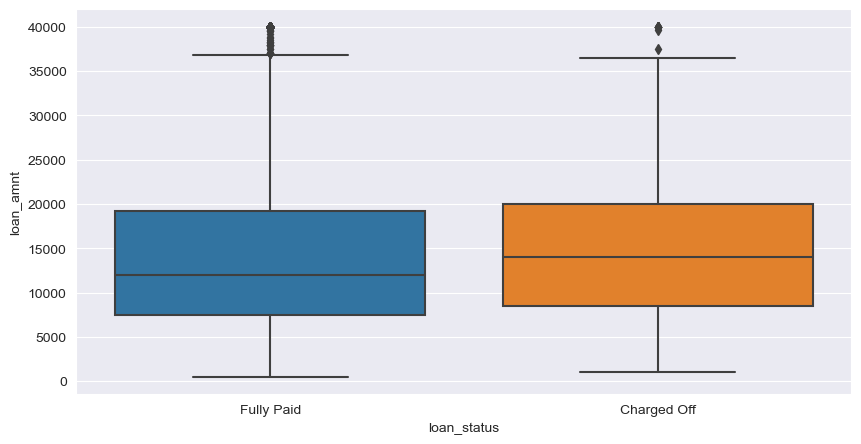

In [65]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'loan_status', y='loan_amnt', data = data)
plt.show()

They are almost equal in numbers. However the loans that were charged off are slightly greater based on the loan amount. This is evident as often it is hard to pay off loan that are high in amount.

Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?

### Grades:

In [66]:
data['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

Sub-grades:

In [67]:
data['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

Let's explore grades in which the LendingClub lended a loan and check how many loans were fully paid or charged off.

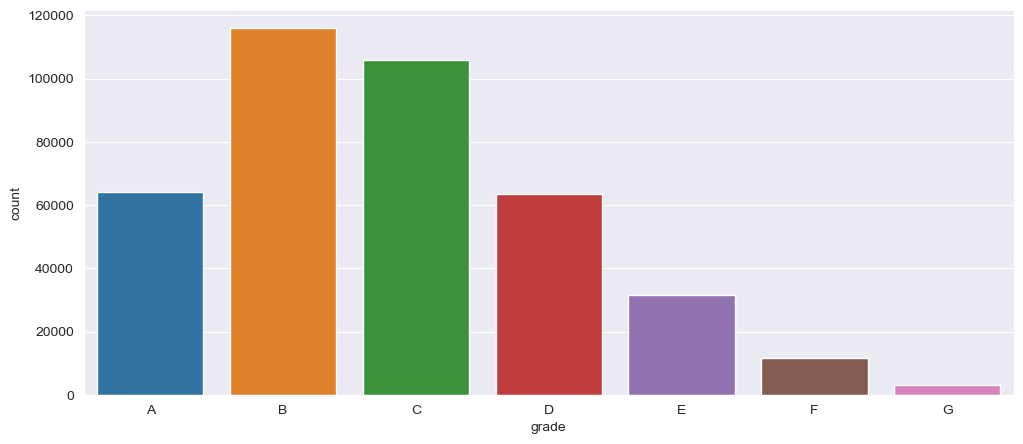

In [68]:
plt.figure(figsize=(12,5))
grade_order = sorted(data['grade'].unique())
sns.countplot(x = 'grade', data= data, order = grade_order)
plt.show()

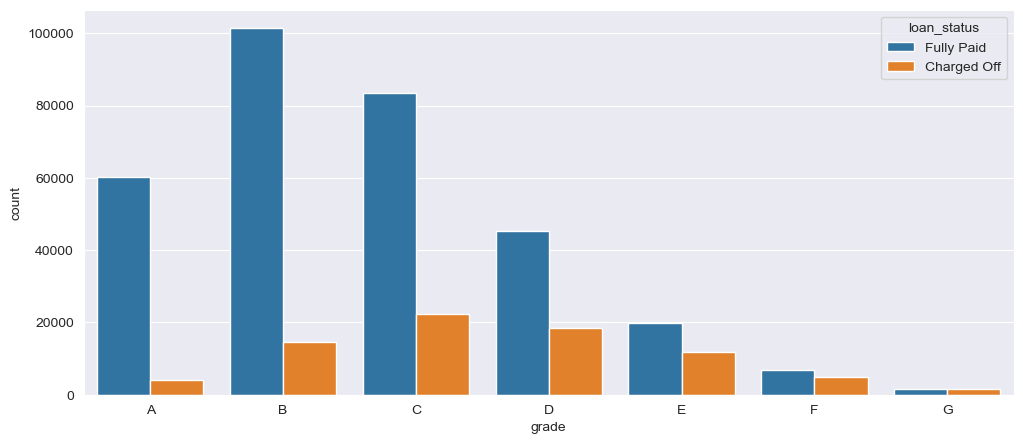

In [69]:
plt.figure(figsize=(12,5))
grade_order = sorted(data['grade'].unique())
sns.countplot(x = 'grade', data= data, hue = 'loan_status', order = grade_order)
plt.show()

Checking the same for the Sub-grades

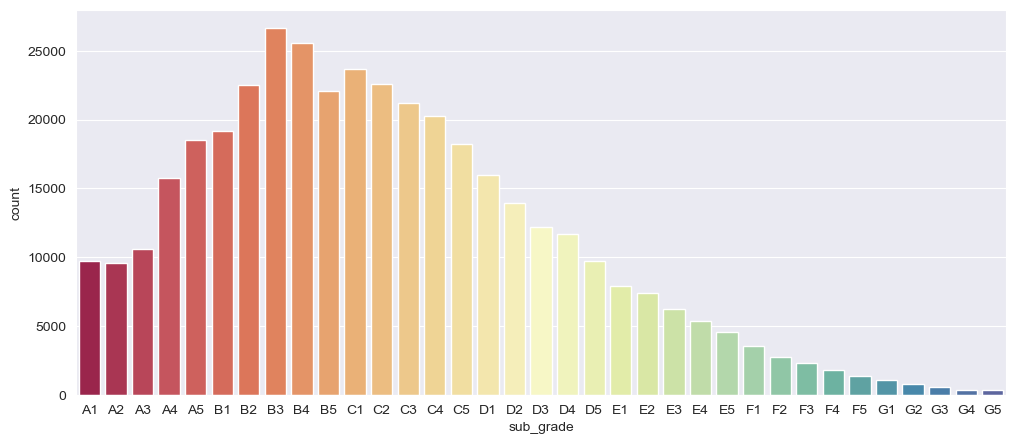

In [70]:
plt.figure(figsize=(12,5))
sub_grade_order = sorted(data['sub_grade'].unique())
sns.countplot(x = 'sub_grade', data= data, order = sub_grade_order, palette='Spectral')
plt.show()

plt.figure(figsize=(12,5))
sub_grade_order = sorted(data['sub_grade'].unique())
sns.countplot(x = 'sub_grade', data= data, hue = 'loan_status', order = sub_grade_order)
plt.show()

Most of the amounts lies between B and D grades.

However, the fully paid and charged off loans seems to be more or less equal in quantity along the F and G gardes. Let's further explore them.

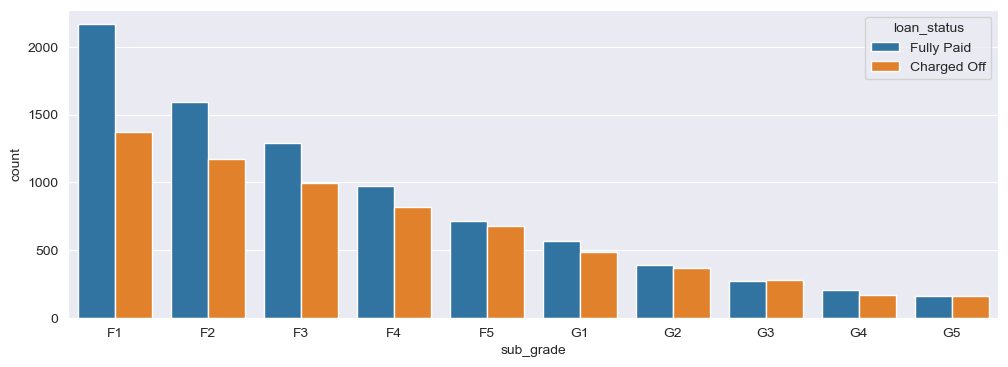

In [71]:
fg_grades = data[(data['grade']=='F') | (data['grade']=='G')]

plt.figure(figsize=(12,4))
sub_grade_order = sorted(fg_grades['sub_grade'].unique())
sns.countplot(x = 'sub_grade', data= fg_grades, hue = 'loan_status', order = sub_grade_order)
plt.show()

The G grade has more or less equal number of paid and unpaid loans.

The G5 sub-grade has an equal number of fully paid and charged off loans. The likelihood of both is 50%.

#### Finally we will create a new column where if the borrower fully paid the loan will have a value 1, and the customer who was charged off will be given 0.

In [72]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [73]:
data['loan_repaid'] = data['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

In [74]:
data[['loan_status','loan_repaid']].head(10)

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
5,Fully Paid,1
6,Fully Paid,1
7,Fully Paid,1
8,Fully Paid,1
9,Fully Paid,1


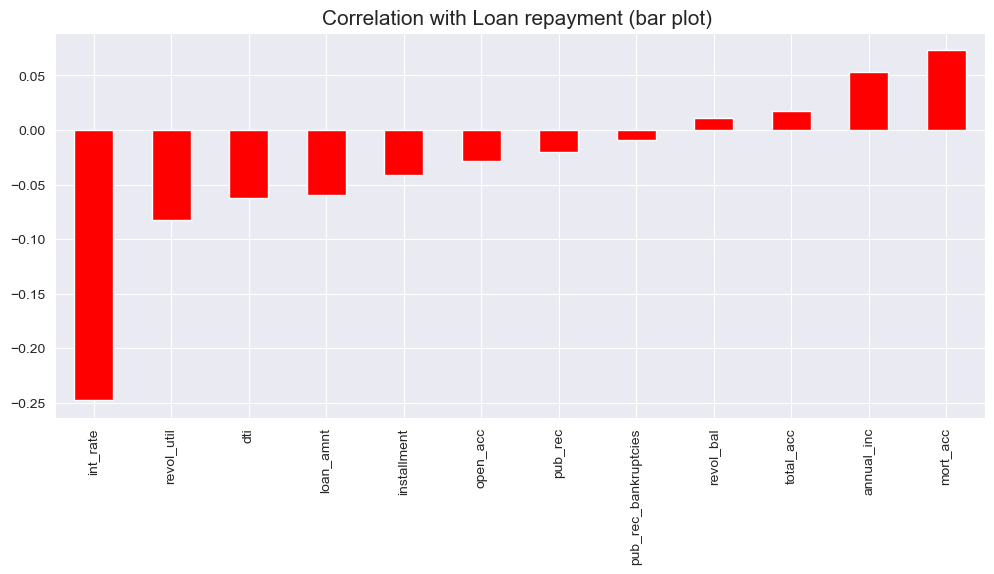

In [75]:
plt.figure(figsize=(12,5))
data.corrwith(data['loan_repaid']).sort_values().drop('loan_repaid').plot(kind='bar', color = 'red')
plt.title('Correlation with Loan repayment (bar plot) ', fontsize= 15)
plt.show()

### Here it is observed that interest rate has a high negative correlation with loan_repaid. This makes sense as a customer will find irt difficult to repay a loan which has a high interest rate.

Let's observe this closely with a boxplot.

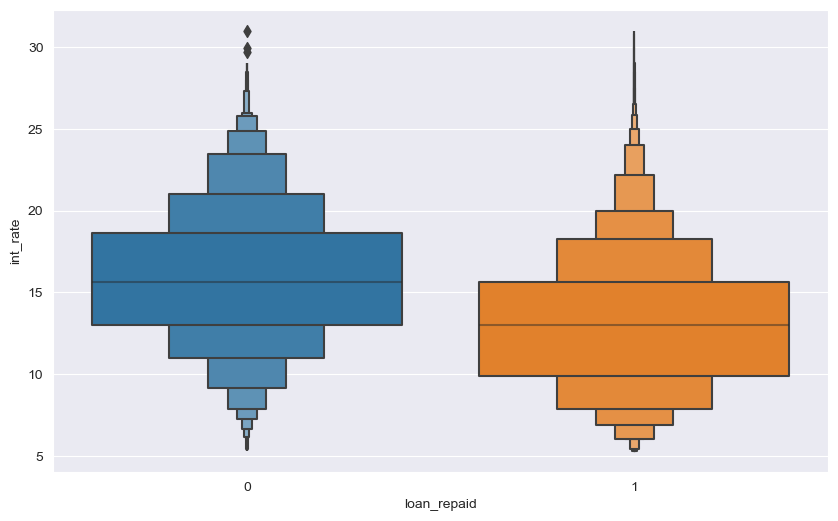

In [76]:
plt.figure(figsize=(10,6))
sns.boxenplot(data['loan_repaid'], data['int_rate'])
plt.show()

Loan amounts with lower interest rates have high chance of getting repaid , wheres amounts that have a higher interest rate have a high chance of being charged off

## Mode 1:Logistic regression 


In [77]:
raw_data = pd.read_csv('Loan_Repayment_Cleaned.csv')
raw_data.head()

,Unnamed: 0,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,1990,16.0,...,1,0,0,1,0,0,0,0,0,0
1,1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,2004,17.0,...,0,1,0,0,0,0,0,0,0,0
2,2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,2007,13.0,...,1,1,0,0,0,0,0,0,0,0
3,3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,2006,6.0,...,1,0,0,0,0,0,0,0,0,0
4,4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,1999,13.0,...,0,0,1,0,0,0,0,0,0,0


In [78]:
data = raw_data.drop('Unnamed: 0', axis = 1)

data.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,1990,16.0,0.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,2004,17.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,2007,13.0,0.0,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,2006,6.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,1999,13.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [79]:
from sklearn.model_selection import train_test_split #importing necessary libraries


train, test = train_test_split(data.drop(['loan_repaid'], axis=1), test_size=0.3 , random_state=1)

In [80]:
from sklearn.model_selection import train_test_split #importing necessary libraries

In [81]:
train, test = train_test_split(data.drop(['loan_status'], axis=1), test_size=0.3 , random_state=1)

In [82]:
X_train = train.drop("loan_repaid",axis=1)
y_train = train["loan_repaid"]
X_test = test.drop("loan_repaid",axis=1)
y_test = test["loan_repaid"]

In [83]:
X_train.shape, X_test.shape #finding shape of training and testing data of X attributes

((276653, 78), (118566, 78))

In [84]:
y_train.shape, y_test.shape  #finding shape of training and testing data of Y attribute

((276653,), (118566,))

In [85]:
# Let's also normalize the values.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
# 1)Logistic Regression
from sklearn.linear_model import LogisticRegression # Fit the model on train
from sklearn.metrics import confusion_matrix, classification_report
lr = LogisticRegression()
lr.fit(X_train, y_train)#fitting logistic regression to dataset
score = lr.score(X_test, y_test)
score

0.8886864699829631

In [87]:
score = lr.score(X_train, y_train)#accuracy score
score

0.8892909167802265

In [88]:
confusion_matrix(y_test, lr.predict(X_test))#plotting confusion matrix

array([[10543, 12664],
       [  534, 94825]], dtype=int64)

In [89]:
print(classification_report(y_test, lr.predict(X_test)))#calculation precision recall scores

              precision    recall  f1-score   support

           0       0.95      0.45      0.62     23207
           1       0.88      0.99      0.93     95359

    accuracy                           0.89    118566
   macro avg       0.92      0.72      0.77    118566
weighted avg       0.90      0.89      0.87    118566



# Model 2: decesion tree

In [90]:
from sklearn.tree import DecisionTreeClassifier #importing libraries

In [91]:
dt=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt.fit(X_train,y_train) #fitting decision tree to dataset

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [92]:
dt.score(X_test , y_test) #finding accuracy on test set

0.8874803906684884

In [93]:
dt.score(X_train, y_train) #finding accuracy on training set

0.8883547259563425

In [94]:
confusion_matrix(y_test, dt.predict(X_test))#plotting confusion matrix

array([[ 9866, 13341],
       [    0, 95359]], dtype=int64)

In [95]:
print(classification_report(y_test, dt.predict(X_test)))#calculation precision recall scores

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     23207
           1       0.88      1.00      0.93     95359

    accuracy                           0.89    118566
   macro avg       0.94      0.71      0.77    118566
weighted avg       0.90      0.89      0.87    118566



# Model 3: Guassian Naive Bayes


In [96]:
from sklearn.naive_bayes import GaussianNB #importing libraries

In [97]:
nb = GaussianNB() 
nb.fit(X_train, y_train) #fitting the modelZ

GaussianNB()

In [98]:
y_pred = nb.predict(X_test)
accuracy = nb.score(X_test, y_test)
print('Accuracy: {:.2f}%'.format(accuracy*100))

Accuracy: 86.97%


In [99]:
y_pred_train = nb.predict(X_train)
accuracy_train = nb.score(X_train, y_train)
print('Training Accuracy: {:.2f}%'.format(accuracy_train*100))

Training Accuracy: 87.04%


In [100]:
confusion_matrix(y_test, nb.predict(X_test)) #plotting confusion matrix

array([[12465, 10742],
       [ 4713, 90646]], dtype=int64)

In [101]:
print(classification_report(y_test, nb.predict(X_test))) #plotting report

              precision    recall  f1-score   support

           0       0.73      0.54      0.62     23207
           1       0.89      0.95      0.92     95359

    accuracy                           0.87    118566
   macro avg       0.81      0.74      0.77    118566
weighted avg       0.86      0.87      0.86    118566



# model 4 knn

In [102]:
from sklearn.neighbors import KNeighborsClassifier #importing libraries


In [103]:
from sklearn.metrics import accuracy_score #importing libraries

In [104]:
knn = KNeighborsClassifier(n_neighbors=5) #no. of neighbours=5

In [105]:
X_test_subset, y_test_subset = X_test[:5000], y_test[:5000]

X_train_subset, y_train_subset = X_train[:5000], y_train[:5000]

In [106]:
knn.fit(X_train,y_train) #fitting the knn model

KNeighborsClassifier()

In [107]:
y_pred = knn.predict(X_test_subset) #predicting on test set
acc = accuracy_score(y_pred, y_test_subset)
acc

0.866

In [108]:
y_pred = knn.predict(X_train_subset) #predicting on training set
acc = accuracy_score(y_pred, y_train_subset)
acc

0.9132

In [109]:
confusion_matrix(y_test_subset, knn.predict(X_test_subset))

array([[ 493,  499],
       [ 171, 3837]], dtype=int64)

In [110]:
print(classification_report(y_test_subset, knn.predict(X_test_subset)))

              precision    recall  f1-score   support

           0       0.74      0.50      0.60       992
           1       0.88      0.96      0.92      4008

    accuracy                           0.87      5000
   macro avg       0.81      0.73      0.76      5000
weighted avg       0.86      0.87      0.86      5000



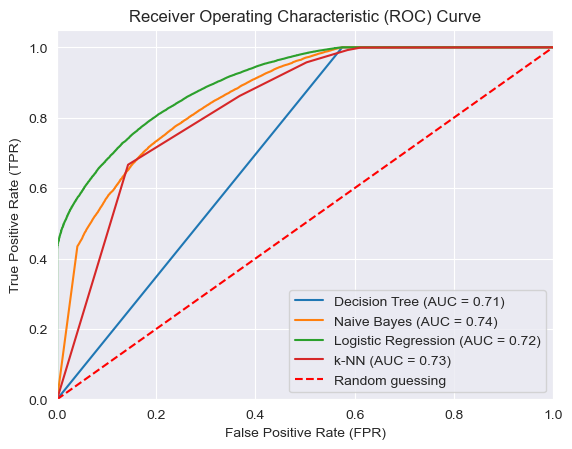

In [111]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Decision Tree
dt_roc_auc = roc_auc_score(y_test, dt.predict(X_test))
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = %0.2f)' % dt_roc_auc)

# Naive Bayes
nb_roc_auc = roc_auc_score(y_test, nb.predict(X_test))
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = %0.2f)' % nb_roc_auc)

# Logistic Regression
lr_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (AUC = %0.2f)' % lr_roc_auc)

# k-NN
knn_roc_auc = roc_auc_score(y_test_subset, knn.predict(X_test_subset))
knn_fpr, knn_tpr, _ = roc_curve(y_test_subset, knn.predict_proba(X_test_subset)[:,1])
plt.plot(knn_fpr, knn_tpr, label='k-NN (AUC = %0.2f)' % knn_roc_auc)

# Random guessing
plt.plot([0, 1], [0, 1],'r--', label='Random guessing')

# Plot formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('ROC.png', dpi=300)
plt.show()


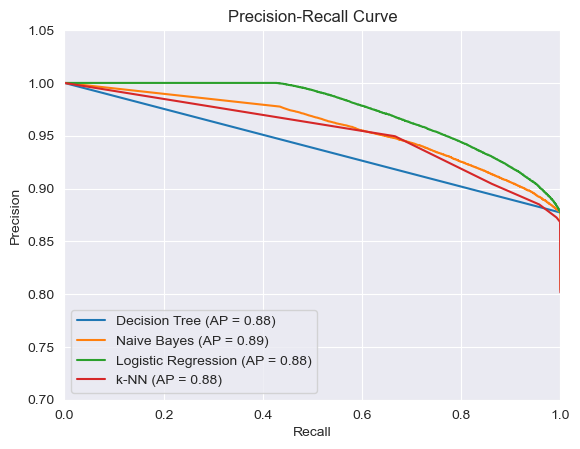

In [112]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Decision Tree
dt_pr_auc = average_precision_score(y_test, dt.predict(X_test))
dt_precision, dt_recall, _ = precision_recall_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.plot(dt_recall, dt_precision, label='Decision Tree (AP = %0.2f)' % dt_pr_auc)

# Naive Bayes
nb_pr_auc = average_precision_score(y_test, nb.predict(X_test))
nb_precision, nb_recall, _ = precision_recall_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.plot(nb_recall, nb_precision, label='Naive Bayes (AP = %0.2f)' % nb_pr_auc)

# Logistic Regression
lr_pr_auc = average_precision_score(y_test, lr.predict(X_test))
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.plot(lr_recall, lr_precision, label='Logistic Regression (AP = %0.2f)' % lr_pr_auc)

# k-NN
knn_pr_auc = average_precision_score(y_test_subset, knn.predict(X_test_subset))
knn_precision, knn_recall, _ = precision_recall_curve(y_test_subset, knn.predict_proba(X_test_subset)[:,1])
plt.plot(knn_recall, knn_precision, label='k-NN (AP = %0.2f)' % knn_pr_auc)

# Plot formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.7, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.savefig('PR.png', dpi=300)
plt.show()


In [113]:
from sklearn.metrics import accuracy_score

# Decision Tree
dt_acc = accuracy_score(y_test, dt.predict(X_test))

# Naive Bayes
nb_acc = accuracy_score(y_test, nb.predict(X_test))

# Logistic Regression
lr_acc = accuracy_score(y_test, lr.predict(X_test))

# k-NN
knn_acc = accuracy_score(y_test_subset, knn.predict(X_test_subset))

print('Decision Tree Accuracy:', dt_acc)
print('Naive Bayes Accuracy:', nb_acc)
print('Logistic Regression Accuracy:', lr_acc)
print('k-NN Accuracy:', knn_acc)


Decision Tree Accuracy: 0.8874803906684884
Naive Bayes Accuracy: 0.8696506587048564
Logistic Regression Accuracy: 0.8886864699829631
k-NN Accuracy: 0.866


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 11.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 11.5min finished


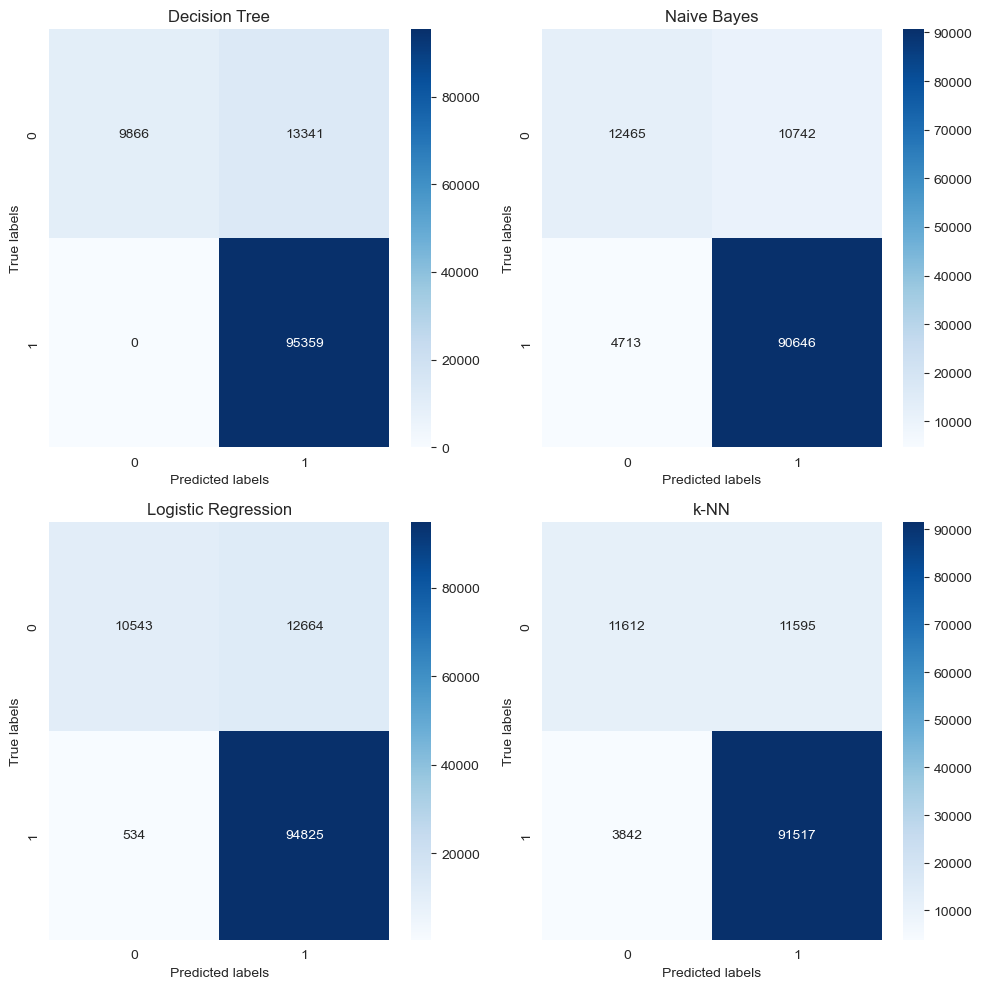

In [114]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from joblib import Parallel, delayed

# Generate confusion matrices for all models in parallel
def generate_conf_matrix(model, model_name):
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return (conf_matrix, model_name)

conf_matrices = Parallel(n_jobs=-1, verbose=1)(
    delayed(generate_conf_matrix)(model, model_name) for model, model_name in [(dt, 'Decision Tree'), (nb, 'Naive Bayes'), (lr, 'Logistic Regression'), (knn, 'k-NN')])

# Plot all confusion matrices in a single figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for ax, (conf_matrix, model_name) in zip(axes.flat, conf_matrices):
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(model_name)

plt.tight_layout()
plt.show()

